***Author: Ahmad Hashim***

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,6.0)

***Step#01: Loading Data***

In [ ]:
dataset=pd.read_csv('Dataset.csv')
print(dataset.shape)
dataset.head()

(96, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


***Step#02: Plotting Data***

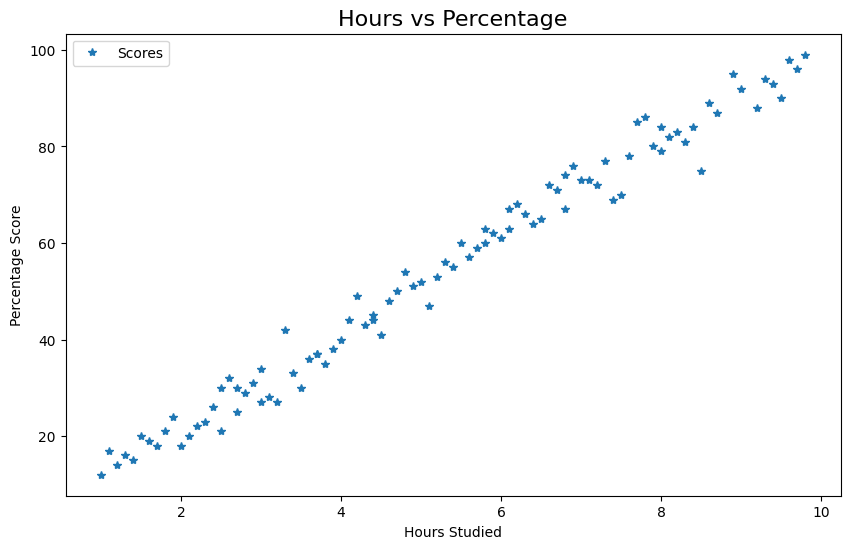

In [ ]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

***Step#03: Building A Linear Regression Model***

In [ ]:
#Collecting x and y
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                            test_size=0.2, random_state=0)

***Step#04: Training The Model***

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print("Training complete.")

Training complete.


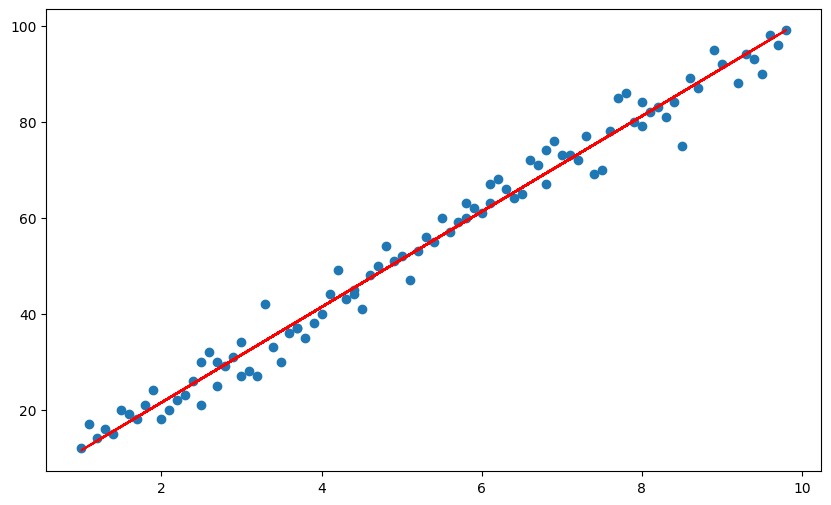

In [ ]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

In [ ]:
print("Weights:" , reg.coef_ )
print("Intercepts:" , reg.intercept_ )

Weights: [9.94599746]
Intercepts: 1.565513590684283


In [ ]:
print("Accuracy of Training learning rate -",reg.score(x_train, y_train)*100)
print("Accuracy of Testing learning rate - ",reg.score(x_test, y_test)*100)

Accuracy of Training learning rate - 98.28094471785369
Accuracy of Testing learning rate -  97.43716699006578


***Step#05: Making Predictions***

In [ ]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

[[9.5]
 [4. ]
 [3.2]
 [4.6]
 [6.8]
 [7.2]
 [2.5]
 [5.6]
 [2.4]
 [1.4]
 [3.6]
 [3. ]
 [6.5]
 [3.3]
 [5.5]
 [1.6]
 [3.8]
 [7.8]
 [8.1]
 [8.3]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,96.052489
1,40,41.349503
2,27,33.392705
3,48,47.317102
4,74,69.198296
5,72,73.176695
6,30,26.430507
7,57,57.263099
8,26,25.435907
9,15,15.489910


***Step#06: Plotting Regression Line***

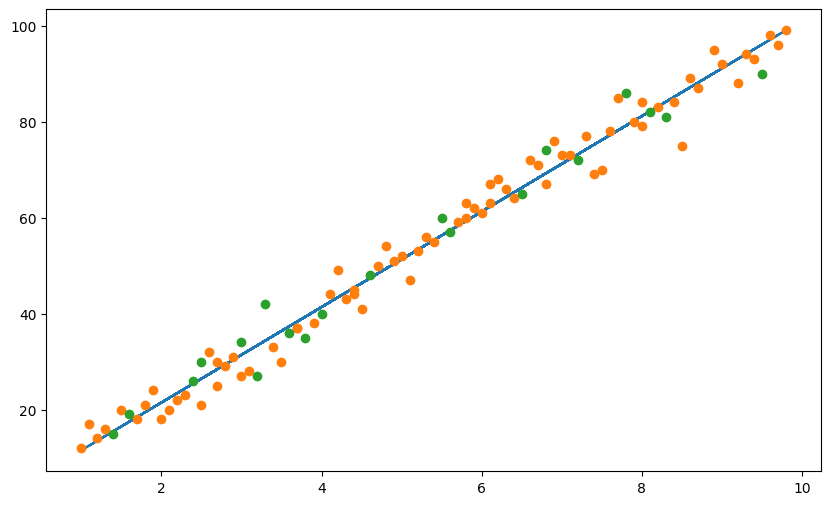

In [ ]:
reg_line=reg.predict(x)
plt.plot(x,reg_line)
plt.plot(x_train,y_train,'o')
plt.plot(x_test,y_test,'o')
plt.show()

***Step#07: Making Predictions On Test Data***

In [ ]:
# You can also test with your own data
hours = [[9.25]]

own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 93.56599011586596


***Step#08: Evaluating The Model***

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2.8925583517538658


***Step#09: Exporting The Model***

In [ ]:
import pickle
pickle.dump(reg,open('model.sav','wb'))